<a href="https://colab.research.google.com/github/rahulpathak2002/ML2/blob/main/Project_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from matplotlib import colors
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV
from IPython.display import display, HTML, Markdown
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/MyDrive")

In [ ]:
#importing the dataset
X_train=pd.read_csv("/content/drive/MyDrive/ML2Project/Santander/train.csv")

In [ ]:
#defining target
target = X_train['TARGET']

In [ ]:
X_train.shape

(76020, 371)

In [ ]:
X_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
X_train.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [ ]:
#checkin for null values
X_train.isnull().sum().any()

False

In [ ]:
# drop ID label from X_train
X_train.drop(['ID'],axis=1,inplace=True)

In [ ]:
# drop TARGET label from X_train
X_train.drop(['TARGET'],axis=1,inplace=True)

## EDA cum Data Preprocessing

In [ ]:
X_train.columns

Index(['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3', 'imp_op_var40_ult1',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=369)

In [ ]:
#counting number of each classes in train set
target.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


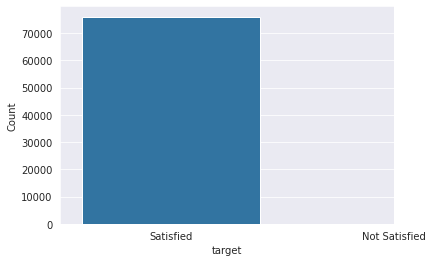

In [ ]:
#Plotting number of each classes in train setplt.figure(dpi=100)
sns.set_style('darkgrid')
sns.countplot(target, data=target)
plt.xlabel('target')
plt.ylabel('Count')
plt.xticks([0,1],['Satisfied','Not Satisfied'])
plt.show()

As shown above, target in the train set is not balanced. So we are going to upsample

In [ ]:
X_train.shape

(76020, 369)

In [ ]:
X_train.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,...,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.0,76020.000000,76020.000000,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04
mean,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,68.803937,113.056934,68.205140,113.225058,137.242763,68.618087,113.792410,140.403479,5.477676,0.011458,0.003762,0.0,0.0,0.958024,0.663760,0.000105,0.000026,0.032833,0.028598,0.067522,0.045462,0.052249,0.042936,0.041476,0.010168,0.009997,0.000026,0.000026,0.050855,0.023652,...,8.913659e+02,1077.256756,1048.856447,68.275452,9.505287,124.620962,110.026575,3.997023e+03,613.534443,5.703008e+03,4.401002e+03,3639.419939,556.184178,4852.261814,3857.848542,771.227449,162.170439,9.569502e+02,7.509563e+02,0.175324,0.0,0.513023,0.344174,9.117181e+01,3.646318e+01,1.310316e+02,1.092169e+02,0.213071,0.001910,0.253907,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05
std,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,319.605516,512.154823,531.897917,950.086398,697.712596,535.473750,953.578624,712.767240,465.391149,0.106425,0.061221,0.0,0.0,0.200535,0.472425,0.010258,0.005129,0.178202,0.166674,0.250925,0.208316,0.222531,0.202714,0.199390,0.100325,0.099486,0.005129,0.005129,0.219703,0.151962,...,9.888597e+03,9614.906985,8189.948852,1733.838226,519.389157,2205.249804,1935.305713,3.777314e+04,9292.752726,4.620254e

min of var3 is -999999, which means NaN or some exception value is replaced by -999999.

In [ ]:
#counting number of -999999
X_train['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 177           1
 87            1
 151           1
 215           1
 191           1
Name: var3, Length: 208, dtype: int64

Replacing -999999 with 2.

In [ ]:
X_train['var3'] = X_train['var3'].replace(-999999, 2)
X_train['var3'].value_counts()

2      74281
8        138
9        110
3        108
1        105
       ...  
177        1
87         1
151        1
215        1
191        1
Name: var3, Length: 207, dtype: int64

In [ ]:
#using sklearn variancethreshold to find constant features

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.01)
sel.fit(X_train)  # fit finds the features with zero variance

VarianceThreshold(threshold=0.01)

In [ ]:
# get_support is a boolean vector that indicates which features are retained
# if we sum over get_support, we get the number of features that are not constant
sum(sel.get_support())

272

In [ ]:
# Finding non-constant features 
len(X_train.columns[sel.get_support()])

272

In [ ]:
constant_columns_train = [column for column in X_train.columns
                    if column not in X_train.columns[sel.get_support()]]

print(len(constant_columns_train))

97


In [ ]:
for column in constant_columns_train:
    print(column)

ind_var1
ind_var2_0
ind_var2
ind_var6_0
ind_var6
ind_var13_largo
ind_var13_medio_0
ind_var13_medio
ind_var14
ind_var17_0
ind_var17
ind_var18_0
ind_var18
ind_var19
ind_var20_0
ind_var20
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var29_0
ind_var29
ind_var30_0
ind_var31_0
ind_var31
ind_var32_cte
ind_var32_0
ind_var32
ind_var33_0
ind_var33
ind_var34_0
ind_var34
ind_var40
ind_var41
ind_var39
ind_var44_0
ind_var44
ind_var46_0
ind_var46
num_var6_0
num_var6
num_var13_medio_0
num_var13_medio
num_var18_0
num_var18
num_var27_0
num_var28_0
num_var28
num_var27
num_var29_0
num_var29
num_var33
num_var34_0
num_var34
num_var41
num_var46_0
num_var46
saldo_var28
saldo_var27
saldo_var41
saldo_var46
imp_amort_var18_hace3
imp_amort_var34_hace3
imp_reemb_var13_hace3
imp_reemb_var33_hace3
imp_trasp_var17_out_hace3
imp_trasp_var33_out_hace3
ind_var7_emit_ult1
ind_var7_recib_ult1
num_var2_0_ult1
num_var2_ult1
num_aport_var33_hace3
num_aport_var33_ult1
num_var7_emit_ult1
num_compra_var44_hace3
num_meses_var

In [ ]:
X_train[['ind_var1','ind_var2']]

,ind_var1,ind_var2
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
76015,0,0
76016,0,0
76017,0,0
76018,0,0


In [ ]:
#dropping constant columns
X_train = X_train.drop(constant_columns_train,axis=1)

In [ ]:
X_train.shape

(76020, 272)

In [ ]:
X_train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var5_0,ind_var5,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13,ind_var14_0,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,...,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,...,0.00,88.89,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,0.18,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,186.09,0.00,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,...,3.00,0.30,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


Finding highly correlated features

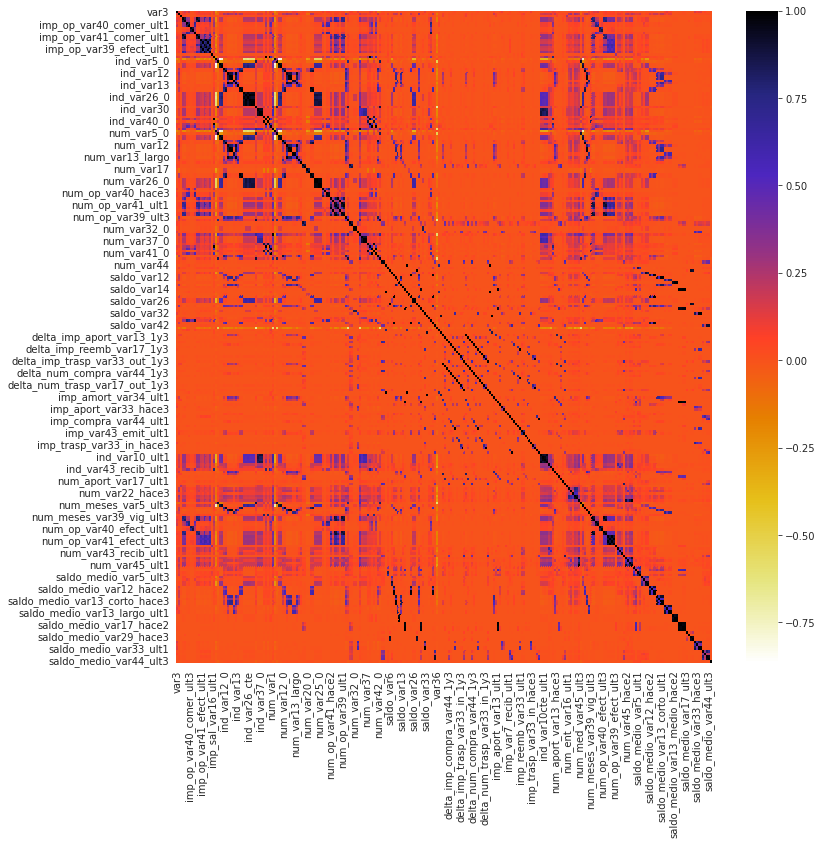

In [ ]:
#Using Pearson Correlation
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sns.heatmap(corrmat,cmap="CMRmap_r")

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.98)
len(set(corr_features))

68

In [ ]:
corr_features

{'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_reemb_var33_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var17_out_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_trasp_var33_out_1y3',
 'delta_num_venta_var44_1y3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_ult1',
 'imp_aport_var17_hace3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_reemb_var33_ult1',
 'imp_trasp_var33_out_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var25',
 'ind_var26',
 'ind_var37',
 'ind_var40_0',
 'ind_var41_0',
 'num_op_var39_efect_ult1',
 'num_op_var39_efect_ult3',
 'num_op_var39_hace2',
 'num_op_var39_hace3',
 'num_op_var39_ult1',
 'num_op_var39_ult3',
 'num_var12',
 'num_var13_corto',
 'num_var13_corto_0',
 'num_var1_0',
 'num_var24',
 'num_var24_0',
 'num_var25',
 'num_var26',
 'num_var32',
 'num_var35',
 'num_

In [ ]:
#removing correlated features
X_train = X_train.drop(corr_features,axis=1)

In [ ]:
X_train.shape

(76020, 204)

In [ ]:
#Feature Scaling
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)


In [ ]:
X_train_scaled.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var5_0,ind_var5,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_largo_0,ind_var14_0,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var25_0,ind_var30,ind_var37_cte,ind_var37_0,ind_var39_0,num_var1,num_var4,num_var5_0,...,num_op_var40_efect_ult3,num_op_var41_comer_ult1,num_op_var41_comer_ult3,num_op_var41_efect_ult1,num_op_var41_efect_ult3,num_sal_var16_ult1,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_venta_var44_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_medio_hace2,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,-0.075835,-0.788249,-0.053388,-0.213263,-0.218813,-0.038206,-0.042103,-0.013493,-0.015538,-0.033177,-0.215279,-0.220749,-0.128231,-0.119174,-0.196705,-0.01177,-0.107658,0.20932,-1.405013,-0.18425,-0.17158,-0.269093,-0.218236,-0.234798,-0.211807,-0.101355,-0.155643,-0.210345,-0.198435,-0.164756,-0.158936,-0.168343,-0.155598,-1.656196,-0.279161,-0.264226,0.367953,-0.061346,-1.186772,0.161406,...,-0.018163,-0.240903,-0.244844,-0.224049,-0.234897,-0.031836,-0.177277,-0.229084,-0.102956,-0.016726,-0.372048,-0.373859,-0.302886,-0.129987,-0.090141,-0.112041,-0.128067,-0.039378,-0.018301,-0.056511,-0.056853,-0.105817,-0.066023,-0.138071,-0.077435,-0.058953,-0.034513,-0.059784,-0.005063,-0.005095,-0.003627,-0.004875,-0.005854,-0.017408,-0.011979,-0.01565,-0.012576,-0.018817,-0.019847,-0.427183
1,-0.075835,0.060753,-0.053388,-0.213263,-0.218813,-0.038206,-0.042103,-0.013493,-0.015538,-0.033177,-0.215279,-0.220749,-0.128231,-0.119174,-0.196705,-0.01177,-0.107658,0.20932,-1.405013,-0.18425,-0.17158,-0.269093,-0.218236,4.258987,4.721275,-0.101355,-0.155643,-0.210345,-0.198435,-0.164756,-0.158936,-0.168343,-0.155598,0.603793,-0.279161,-0.264226,0.367953,-0.061346,-0.087339,0.161406,...,-0.018163,-0.240903,-0.244844,-0.224049,-0.234897,-0.031836,-0.177277,-0.229084,-0.102956,-0.016726,-0.372048,-0.373859,-0.302886,-0.129987,-0.081152,-0.112041,-0.128067,-0.039378,-0.018301,-0.056511,-0.056853,-0.105817,-0.066023,-0.126690,-0.060419,-0.058953,-0.034513,-0.059784,-0.005063,-0.005095,-0.003627,-0.004875,-0.005854,-0.017408,-0.011979,-0.01565,-0.012576,-0.018817,-0.019847,-0.372038
2,-0.075835,-0.788249,-0.053388,-0.213263,-0.218813,-0.038206,-0.042103,-0.013493,-0.015538,-0.033177,-0.215279,-0.220749,-0.128231,-0.119174,-0.196705,-0.01177,-0.107658,0.20932,0.711737,-0.18425,-0.17158,-0.269093,-0.218236,-0.234798,-0.211807,-0.101355,-0.155643,-0.210345,-0.198435,-0.164756,-0.158936,-0.168343,-0.155598,0.603793,-0.279161,-0.264226,0.367953,-0.061346,-0.087339,0.161406,...,-0.018163,-0.240903,-0.244844,-0.224049,-0.234897,-0.031836,-0.177277,-0.229084,-0.102956,-0.016726,-0.372048,-0.373859,-0.302886,-0.129740,-0.090123,-0.111729,-0.127814,-0.039378,-0.018301,-0.056511,-0.056853,-0.105817,-0.066023,-0.138071,-0.077435,-0.058953,-0.034513,-0.059784,-0.005063,-0.005095,-0.003627,-0.004875,-0.005854,-0.017408,-0.011979,-0.01565,-0.012576,-0.018817,-0.019847,-0.273191
3,-0.075835,0.292298,-0.053388,0.361427,0.138158,-0.038206,-0.042103,-0.013493,-

### Upsampling using SMOTE from imblearn due to imbalanced dataset

In [ ]:
from imblearn.over_sampling import SMOTE
# print(imblearn.__version__)
oversample = SMOTE()
X_new, y_new = oversample.fit_resample(X_train_scaled, target)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from collections import Counter
print('Origianl dataset shape:', Counter(target))
print('Resample dataset shape:', Counter(y_new))

Origianl dataset shape: Counter({0: 73012, 1: 3008})
Resample dataset shape: Counter({0: 73012, 1: 73012})


In [ ]:
print(X_new.shape,y_new.shape)

(146024, 204) (146024,)


## Modeling

In [ ]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.80,random_state=42,stratify=y_new)

### Baseline model - Logistic Regression

In [ ]:
logreg = LogisticRegression(C=0.001,penalty='l2')
logreg.fit(x_train, y_train)
y_pred_log = logreg.predict(x_test)

print('Logistic Regression accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_log)))

Logistic Regression accuracy score: 0.7120


In [ ]:
f1_lr=f1_score(y_test, y_pred_log, average='macro')
print(f1_lr)

0.7117624111138403


In [ ]:
confusion_matrix (y_test,y_pred_log)

array([[39848, 18562],
       [15080, 43330]])

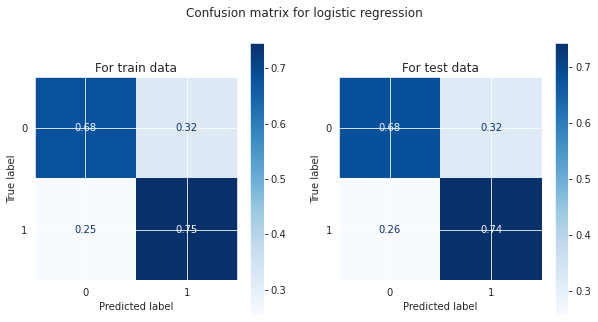

In [ ]:
#plot the confusion matrix
#your code here
fig,ax=plt.subplots(1,2,figsize=(10,5))
plt.suptitle('Confusion matrix for logistic regression')
plot_confusion_matrix(logreg, x_train, y_train,
                                 cmap=plt.cm.Blues,
                                 normalize='true',ax=ax[0])
ax[0].set_title('For train data')
plot_confusion_matrix(logreg, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true',ax=ax[1])
ax[1].set_title('For test data');

### Desicion Tree model

In [ ]:
DecisionTree=DecisionTreeClassifier(random_state=42).fit(x_train,y_train)

In [ ]:
y_pred_DT=DecisionTree.predict(x_test)

In [ ]:
print('Decision Tree accuracy score for test: {0:0.4f}'. format(accuracy_score(y_test, y_pred_DT)))

Decision Tree accuracy score for test: 0.8657


In [ ]:
f1_DT=f1_score(y_test, y_pred_DT, average='macro')
print(f1_DT)

0.8656593346978874


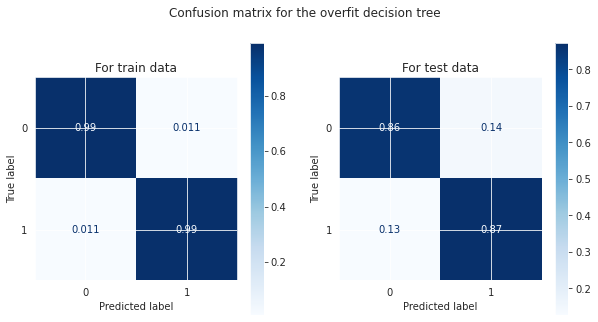

In [ ]:
#plot the confusion matrix
#your code here
fig,ax=plt.subplots(1,2,figsize=(10,5))
plt.suptitle('Confusion matrix for the overfit decision tree')
plot_confusion_matrix(DecisionTree, x_train, y_train,
                                 cmap=plt.cm.Blues,
                                 normalize='true',ax=ax[0])
ax[0].set_title('For train data')
plot_confusion_matrix(DecisionTree, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true',ax=ax[1])
ax[1].set_title('For test data');

## Ensemble Models

### Random Forest classifier

In [ ]:
RF_model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       criterion='gini', max_depth=1000, max_features='auto',
                       max_leaf_nodes=500, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=-1, oob_score=False,
                       verbose=0, warm_start=False)

In [ ]:
RF_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1000, max_features='auto',
                       max_leaf_nodes=500, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_rf=RF_model.predict(x_test)

In [ ]:
print('Random forest accuracy score for test: {0:0.4f}'. format(accuracy_score(y_test, y_pred_rf)))

Random forest accuracy score for test: 0.8260


In [ ]:
f1_RF=f1_score(y_test, y_pred_rf)
print(f1_RF)

0.8250572299006866


### Boosting Classifier

In [ ]:
import xgboost as xgb
clf_xgb = xgb.XGBClassifier(n_jobs=-1,
                      nthread=-1,
                      scale_pos_weight=1,
                      learning_rate=0.02,  
                      colsample_bytree = 0.5,
                      subsample = 0.9,
                      objective='binary:logistic', 
                      n_estimators=1000,
                      reg_alpha = 0.2,
                      max_depth=6, 
                      gamma=0, random_state=42
                     )

In [ ]:
clf_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.02, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=-1, objective='binary:logistic', random_state=42,
              reg_alpha=0.2, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [ ]:
y_pred_xgb=clf_xgb.predict(x_test)

In [ ]:
print('XBoost accuracy score for test: {0:0.4f}'. format(accuracy_score(y_test, y_pred_xgb)))

XBoost accuracy score for test: 0.9144


In [ ]:
f1_XB=f1_score(y_test, y_pred_xgb)
print(f1_XB)

0.9154549530117323


## Model performance evaluation

In [ ]:
dataset="Normal with Response Encoding"
global i
i=0
def plot_auc(y_true,y_pred,label,dataset=dataset):
  """
  Plots auc curve when y_true and y_pred are given
  dataset is string which tells which dataset were used.
  label: tells which model was used
  If label is a list plots all the auc curve for all labels (here y_pred will be a list of lists )
  """
  
  
  if (type(label)!=list) & (type(label)!=np.array):
    print("\t\t %s on %s dataset \t\t \n"%(label,dataset))
    fpr,tpr,threshold = metrics.roc_curve(y_true,y_pred) #getting true positive rate, false positive rate
    auc = metrics.roc_auc_score(y_true,y_pred) #getting auc score
    log_loss = metrics.log_loss(y_true,y_pred) #getting logloss
    label_1 = label+' AUC=%.3f'%(auc)

    #plotting tpr vs fpr
    sns.lineplot(fpr,tpr,label=label_1)
    x=np.arange(0,1.1,0.1) #auc=0.5 line 
    sns.lineplot(x,x,label="AUC=0.5")
    plt.title("ROC on %s dataset"%(dataset))
    plt.xlabel('False Positive Rate')
    plt.ylabel("True Positive Rate")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #legend box outside graph
    plt.show()
    print("The log loss and auc was found to be %.3f and %.3f for %s on %s dataset."%(log_loss,auc,label,dataset))
    #creating a dataframe of the result
    result_dict = {"Model":label,'Dataset':dataset,'log_loss':log_loss,'auc':auc}
    
    return pd.DataFrame(result_dict,index=[i])

  else:
    plt.figure(figsize=(12,8))
    for k,y in enumerate(y_pred):
      fpr,tpr,threshold = metrics.roc_curve(y_true,y)
      auc = metrics.roc_auc_score(y_true,y)
      label_ = label[k]+' AUC=%.3f'%(auc)
      #plotting tpr vs fpr
      sns.lineplot(fpr,tpr,label=label_)

    x=np.arange(0,1.1,0.1)
    sns.lineplot(x,x,label="AUC=0.5")
    plt.title("Combined ROC")
    plt.xlabel('False Positive Rate')
    plt.ylabel("True Positive Rate")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #legend box outside graph
    plt.show()

In [ ]:

def plot_feature_importance(df,feat_imp,top=20,size=(6,6)):
    """
    getting most important top features if df and feature_importance array is passed
    """
    top_indices = np.argsort(feat_imp)[::-1][:top] #getting the indices with top feature importace
    most_important_feat = df.columns[top_indices] #getiing the columns names
    plt.figure(figsize=size)
    sns.barplot(x=feat_imp[top_indices],y=most_important_feat) #plotting feature importance 
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel("Feature names")
    plt.show()

In [ ]:
def get_top_features(df,feat_imp,top=50):
  """
  gets the top features.
  if top is of integer dtype it will return top features,
  if top is between 0 and 1, it will return features that have at least feature importance value= top
  """
  if (top>0.)&(top<=1.): #getting the features that have feature importance value greater than top
    feature_to_consider = [1 if i>=top else 0 for i in feat_imp]
    most_important_feat = [i  for i,j in zip(df.columns,feature_to_consider) if (j==1)]#getiing the columns names
  else:
    top_indices = np.argsort(feat_imp)[::-1][:top] #getting the indices with top feature importace
    most_important_feat = df.columns[top_indices] #getiing the columns names
  return most_important_feat

		 Logisic Regression on Normal with Response Encoding dataset 		 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


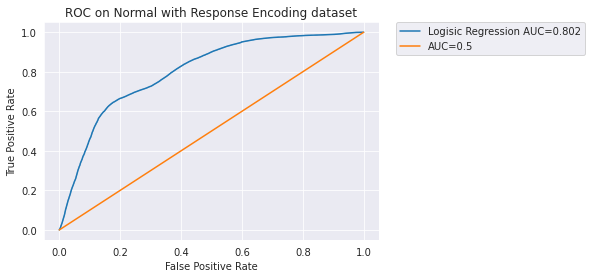

The log loss and auc was found to be 0.555 and 0.802 for Logisic Regression on Normal with Response Encoding dataset.


In [ ]:
labels=[] #storing all labels
y_preds = [] #storing all y_pred
y_pred_log = logreg.predict_proba(x_test)[:,1]
label="Logisic Regression"
labels.append(label)
y_preds.append(y_pred_log)
result = plot_auc(y_test,y_pred_log,label)
result_df = result
del result

In [ ]:
lr_auc = roc_auc_score(y_test, y_pred_log)
lr_auc

0.8016661719027376

In [ ]:
result_df

,Model,Dataset,log_loss,auc
0,Logisic Regression,Normal with Response Encoding,0.556431,0.801666


		 Decision Tree Classifier on Normal with Response Encoding dataset 		 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


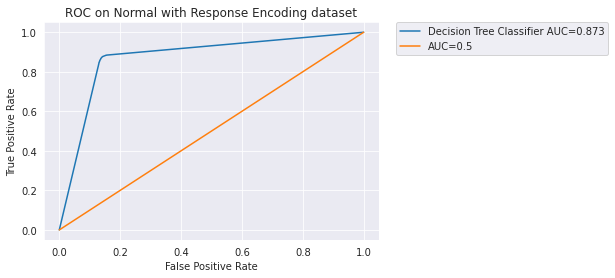

The log loss and auc was found to be 4.221 and 0.873 for Decision Tree Classifier on Normal with Response Encoding dataset.


In [ ]:
i+=1
y_pred_DT=DecisionTree.predict_proba(x_test)[:,1]
label="Decision Tree Classifier"
labels.append(label)
y_preds.append(y_pred_DT)
result = plot_auc(y_test,y_pred_DT,label)
result_df = result_df.append(result)
del result

In [ ]:
result_df

,Model,Dataset,log_loss,auc
0,Logisic Regression,Normal with Response Encoding,0.556431,0.801666
4,Decision Tree Classifier,Normal with Response Encoding,4.220769,0.872632


		 Random Forest Classifier on Normal with Response Encoding dataset 		 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


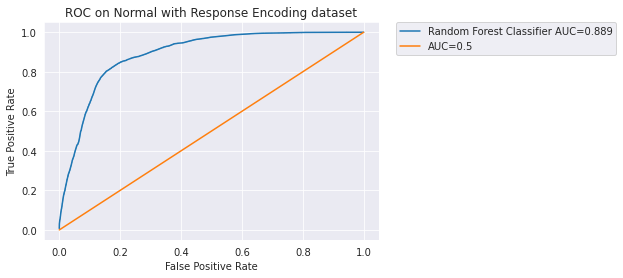

The log loss and auc was found to be 0.453 and 0.889 for Random Forest Classifier on Normal with Response Encoding dataset.


In [ ]:
i+=1
y_pred_rf=RF_model.predict_proba(x_test)[:,1]
label="Random Forest Classifier"
labels.append(label)
y_preds.append(y_pred_rf)
result = plot_auc(y_test,y_pred_rf,label,dataset)
result_df = result_df.append(result)
del result

In [ ]:
result_df

		 XBoost Classifier on Normal with Response Encoding dataset 		 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


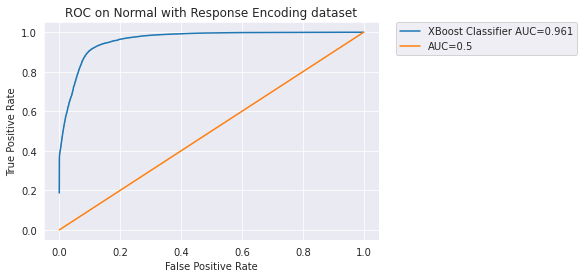

The log loss and auc was found to be 0.267 and 0.961 for XBoost Classifier on Normal with Response Encoding dataset.


In [ ]:
i+=1
y_pred_xgb=clf_xgb.predict_proba(x_test)[:,1]
label="XBoost Classifier"
labels.append(label)
y_preds.append(y_pred_xgb)
result = plot_auc(y_test,y_pred_xgb,label,dataset)
result_df = result_df.append(result)
del result

In [ ]:
result_df

,Model,Dataset,log_loss,auc
0,Logisic Regression,Normal with Response Encoding,0.556431,0.801666
4,Decision Tree Classifier,Normal with Response Encoding,4.220769,0.872632
5,Random Forest Classifier,Normal with Response Encoding,0.452831,0.888975
7,XBoost Classifier,Normal with Response Encoding,0.266911,0.960791


In [ ]:
def p_importance(model, cols, fi, fistd = 0):
    return pd.DataFrame({'features':cols, 'importance':fi, 'importance_std': fistd}
                       ).sort_values('importance', ascending=False)

In [ ]:
from sklearn.inspection import permutation_importance
#def PI_plot(model,X_test,y_test):
  result = permutation_importance(model, X_test, y_test,n_repeats=30,random_state=42)
  cols=list(X_test.columns)
  df=p_importance(model,cols,result.importances_mean,result.importances_std)
  fig, ax = plt.subplots(figsize=(10,5))
  ax.plot(df['features'],df['importance'],'-o')
  ax.set(xlabel='Features',ylabel='Mean_importance',title="Permutation Importance plot with importance upto 2 standard deviations")
  ax.fill_between(df['features'],df['importance']-2*df['importance_std'],df['importance']+2*df['importance_std'],alpha=0.3)
  plt.xticks(rotation=45)
  plt.tight_layout()

In [ ]:
#plot_feature_importance(x_train,model.feature_importances_,top=50,size=(7,12))